<a href="https://colab.research.google.com/github/Azwraithz/Coderhouse-DataScience-C77695/blob/main/Proyecto_Final_Morales_Luis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abstract**

# **Análisis exploratorio sobre el Comportamiento de Compras de Clientes**

El presente proyecto se centra en el análisis exploratorio sobre el **Comportamiento de Compras de Clientes**, utilizando un dataset que combina información demográfica, características de los productos adquiridos, variables de temporada, talles y precios. El propósito es detectar patrones relevantes, relaciones entre variables y posibles anomalías que ayuden a comprender mejor los factores que influyen en las decisiones de consumo. A través de técnicas de limpieza de datos, estadísticas descriptivas y visualizaciones, se construye un panorama inicial que permite evaluar la calidad de la información y extraer hallazgos significativos.

Más allá de describir las tendencias, el análisis busca aportar una mirada práctica orientada al negocio, identificando diferencias en hábitos de compra entre grupos de clientes, variaciones según temporada y productos más representativos. Estos resultados funcionan como insumos para la toma de decisiones estratégicas, así como para futuros procesos de segmentación y modelado predictivo, fortaleciendo la capacidad de anticipar comportamientos y diseñar acciones más efectivas de marketing y fidelización.

## Preguntas de interés / Hipótesis


1. ¿Qué caracteristicas poseen los clientes que participan en este relevamiento?
2. ¿Qué edad poseen? ¿Hay un género con mayor participación? ¿Localidad a la que pertenecen?
3. ¿Qué comportamiendo presentan los clientes por temporadas?
4. ¿Cómo se relaciona la frecuencia de compras?
5. ¿Cualés son los medios de pagos mas utilizados y en que temporada?
6. ¿Qué localidades presentan un mayor consumo?
7. ¿Cuál fue el articulo más comprado por los clientes?




In [129]:
# Importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [130]:
# Lectura de archivo CSV - memoria
# df = pd.read_csv('/content/tendencia_de_compras.csv')

In [131]:
# Lectura de archivo CSV - Github
df = pd.read_csv('https://raw.githubusercontent.com/Azwraithz/Coderhouse-DataScience-C77695/refs/heads/main/tendencia_de_compras.csv')

In [132]:
# Análisis exploratorios de la estructura
print('Dimensión del DataFrame: ', df.shape)
print('Nombre de columnas:', df.columns)

Dimensión del DataFrame:  (3900, 19)
Nombre de columnas: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [133]:
# Renombrar columnas para eliminar espacios o guiones medios
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.rename(columns={c: rename_col(c) for c in df.columns}, inplace=True)
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_Of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [134]:
# Análisis exploratorios de la estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_(USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [135]:
# Análisis exploratorios de la estructura
df.dtypes

,0
Customer_ID,int64
Age,int64
Gender,object
Item_Purchased,object
Category,object
Purchase_Amount_(USD),int64
Location,object
Size,object
Color,object
Season,object


In [136]:
# Análisis exploratorios de la estructura
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_Of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [137]:
# Análisis exploratorios de estadísticas
df.describe()

,Customer_ID,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [138]:
# Análisis exploratorios de estadísticas
df.describe(include="O")

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Frequency_Of_Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [139]:
# Análisis exploratorios de estadísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase_Amount_(USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [140]:
# Análisis exploratorios de estadísticas - Valores únicos por columna
df.nunique()

,0
Customer_ID,3900
Age,53
Gender,2
Item_Purchased,25
Category,4
Purchase_Amount_(USD),81
Location,50
Size,4
Color,25
Season,4


In [141]:
# Análisis exploratorios de estadísticas - Para corroborar algun campo necesario
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [142]:
# Análisis exploratorios - Valores faltantes - Por columna
df.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
Item_Purchased,0
Category,0
Purchase_Amount_(USD),0
Location,0
Size,0
Color,0
Season,0


In [143]:
# Análisis exploratorios - Valores faltantes - Porcentajes de nulos
df.isna().mean ()

,0
Customer_ID,0.0
Age,0.0
Gender,0.0
Item_Purchased,0.0
Category,0.0
Purchase_Amount_(USD),0.0
Location,0.0
Size,0.0
Color,0.0
Season,0.0


In [144]:
# Análisis exploratorios - Valores faltantes - Cantidad de filas duplicadas
print('Cantidad de registros duplicados:', df.duplicated().sum())

Cantidad de registros duplicados: 0


En este punto se confirma que el conjunto de datos está limpio, es consistente y está listo para un posterior análisis.

# Análisis demográfico de clientes



In [145]:
# Conteo de clientes categorizados por género:
df['Gender'].value_counts()

,count
Gender,
Male,2652
Female,1248


In [146]:
# Distribución por género
df['Gender'].value_counts(normalize=True) * 100

,proportion
Gender,
Male,68.0
Female,32.0


In [147]:
# Promedio de edad de los clientes
average_age = df["Age"].mean()

In [148]:
# Distribución de clientes por rangos etarios
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ["16-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

df["AgeGroup"].value_counts(normalize=True) * 100

,proportion
AgeGroup,
46-55,19.307692
56-65,19.230769
26-35,19.025641
36-45,18.692308
16-25,14.641026
65+,9.102564


In [149]:
# TOP 10 de localidades a las que pertenecen los clientes
df['Location'].value_counts().head(10)

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


In [150]:
# Edad promedio por género de los clientes
df.groupby('Gender')['Age'].mean()

,Age
Gender,
Female,44.007212
Male,44.097285


In [151]:
# Edad promedio por localidad
df.groupby('Location')['Age'].mean().sort_values(ascending=False)

,Age
Location,
Louisiana,48.154762
Indiana,48.050633
South Carolina,47.500000
Connecticut,47.320513
Maryland,46.895349
Ohio,46.532468
Rhode Island,46.476190
Wisconsin,45.973333
Missouri,45.740741


## Conclusiones del análisis demográfico

En este dataset participan de 3.900 clientes de los cuales:

*   Masculinos: 2.652 clientes (68%)
*   Femeninos: 1.248 clientes (32%)

Cliente más joven: 18 años

Clientes de mayor edad: 70 años

La edad promedio de ellos es: 44 años

Se distribuyen de la siguiente formas de acuerdo a los siguientes rangos etarios:

*   16-25: 14.64%
*   26-35: 19.02%
*   36-45: 18.69%
*   46-55: 19.30%
*   56-65: 19.23%
*   65+: 9.10%

TOP 10 de localidades a las que pertenecen los clientes:

1.   Montana:	96
2.   California: 95
3.   Idaho: 93
4.   Illinois: 92
5.   Alabama: 89
6.   Minnesota:	88
7.   New York:	87
8.   Nevada:	87
9.   Nebraska:	87
10.   Delaware:	86

Las caracteristicas de edad y género de los clientes se representan en los siguientes gráficos:

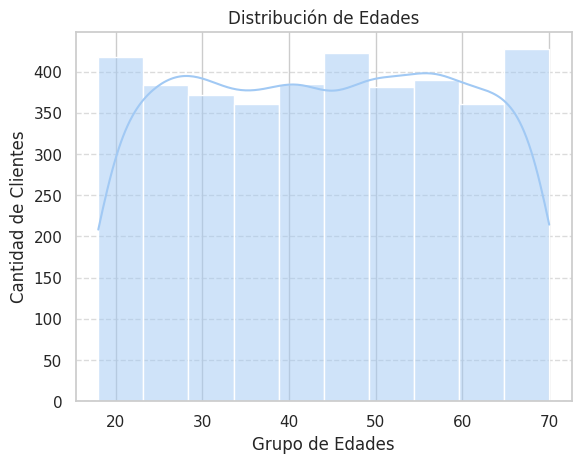

In [152]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribución de Edades")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Grupo de Edades")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

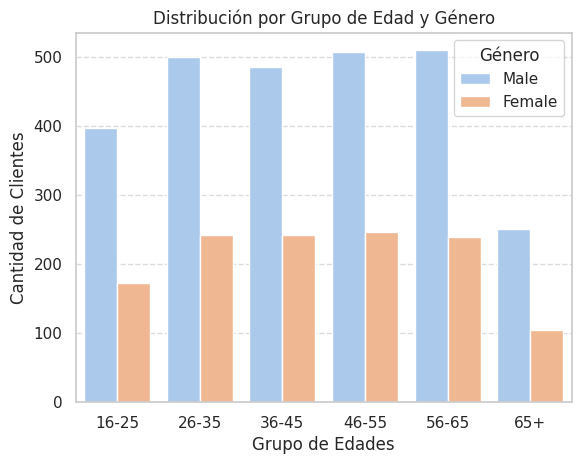

In [153]:
sns.countplot(x="AgeGroup", hue="Gender", data=df)
plt.title("Distribución por Grupo de Edad y Género")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Grupo de Edades")
plt.legend(title="Género")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

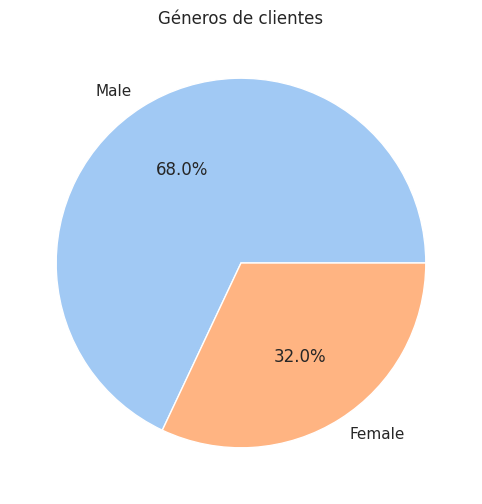

In [154]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.1f%%')
plt.title('Géneros de clientes')
plt.show()

# Análisis de Comportamiento de compras por temporada
Identificando patrones y tendencias de consumo para optimizar estrategias comerciales según la estación del año.

In [155]:
# Ventas por temporadas (Precios en dolares)
ventas = df.groupby("Season")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False)
print(ventas)

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase_Amount_(USD), dtype: int64


In [156]:
# Resumen de montos de acuerdo al metodo de pago
pagos = df["Payment_Method"].value_counts()
print(pagos)

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


In [157]:
# Matriz que combina la temporada y monto pagado por cada método de pago
matriz_pago_temporada = df.pivot_table(
    index="Season",
    columns="Payment_Method",
    values="Purchase_Amount_(USD)",
    aggfunc="sum",
    fill_value=0
)

print(matriz_pago_temporada)

Payment_Method  Bank Transfer   Cash  Credit Card  Debit Card  PayPal  Venmo
Season                                                                      
Fall                     9422   9489        11411       10283    9900   9513
Spring                  10404  10064        10510        8589    8850  10262
Summer                   9083   9459         9084        8923    9227  10001
Winter                   8214   9821        11562        9323    9472  10215


In [158]:
# Media de compras previas vs Frecuencia
frecuencias = df.groupby("Frequency_Of_Purchases")["Previous_Purchases"].agg(["count","mean","median"]).sort_values(by="mean", ascending=False)
print(frecuencias)


                        count       mean  median
Frequency_Of_Purchases                          
Quarterly                 563  26.854352    28.0
Weekly                    539  25.771800    26.0
Monthly                   553  25.278481    25.0
Fortnightly               542  25.271218    26.0
Every 3 Months            584  24.960616    24.0
Bi-Weekly                 547  24.787934    24.0
Annually                  572  24.561189    24.0


In [159]:
# Top de localidades con mayor consumo
locations = df.groupby("Location")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False).head(5)
print(locations)

Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase_Amount_(USD), dtype: int64


<Axes: title={'center': 'Ventas totales por temporada (USD)'}, xlabel='Season'>

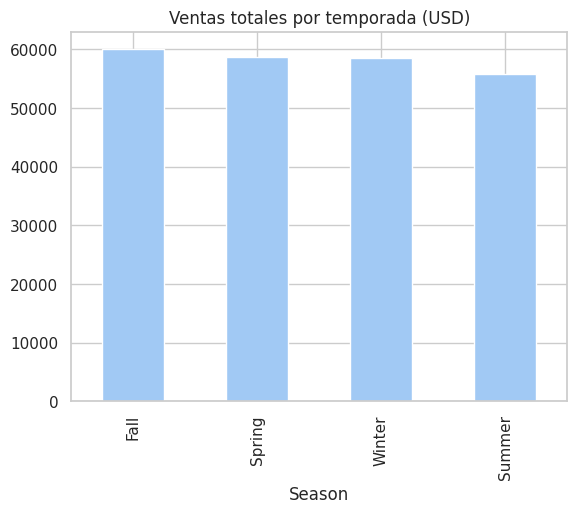

In [160]:
ventas.plot(kind="bar", title="Ventas totales por temporada (USD)")

<Axes: title={'center': 'Métodos de pagos más utilizados'}, xlabel='Payment_Method'>

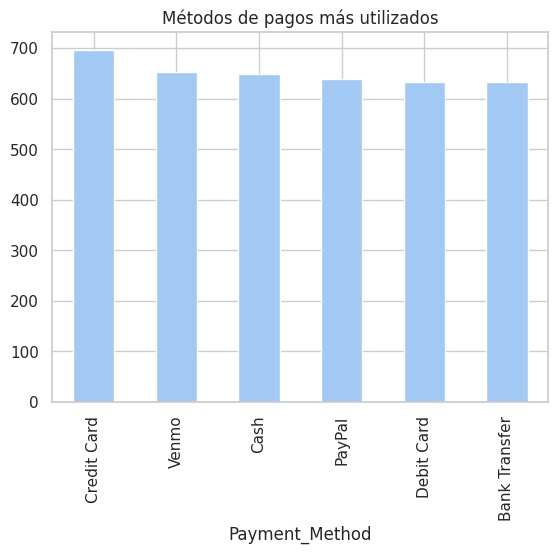

In [161]:
pagos.plot(kind="bar", title="Métodos de pagos más utilizados")

<Axes: title={'center': 'Media de compras previas vs Frecuencia'}, xlabel='Frequency_Of_Purchases'>

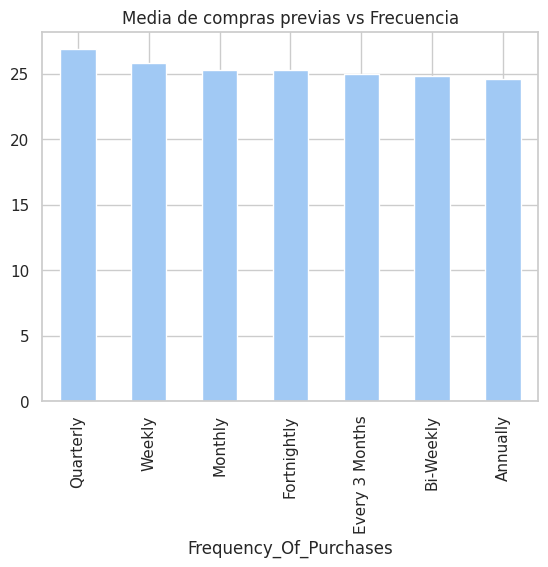

In [162]:
frecuencias["mean"].plot(kind="bar", title="Media de compras previas vs Frecuencia")

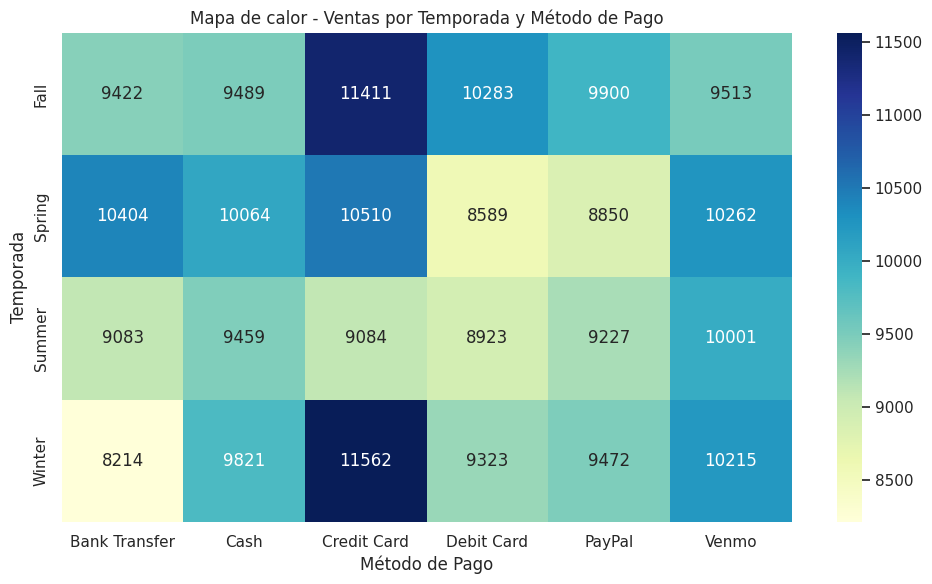

In [163]:
plt.figure(figsize=(10,6))
sns.heatmap(
    matriz_pago_temporada,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)

plt.title("Mapa de calor - Ventas por Temporada y Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Temporada")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 5 Locations by Total Purchase Amount (USD)'}, xlabel='Location'>

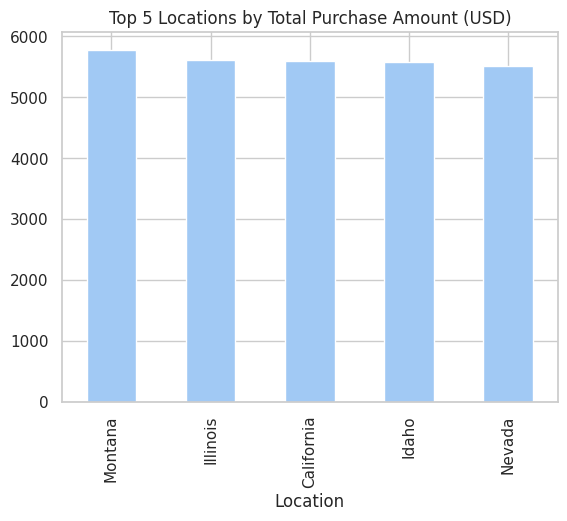

In [164]:
locations.plot(kind="bar", title="Top 5 Locations by Total Purchase Amount (USD)")

## Conclusiones del análisis de comportamiento

Se tienen en cuenta datos que revela patrones significativos en el comportamiento de compra según temporadas, métodos de pago, frecuencias de compra y ubicaciones geográficas.

* ### Ventas por Temporada

La temporada de otoño registra el mayor volumen de ventas con 60.018 USD, seguida de cerca por primavera 58.679 USD y invierno 58.607 USD, mientras que el verano presenta el menor monto con 55.777 USD. Esto sugiere una mayor actividad comercial en otoño, posiblemente influenciada por eventos estacionales como el regreso a clases o festividades.

* ### Métodos de Pago

La tarjeta de crédito es el método de pago más utilizado (696 transacciones), seguido por Venmo (653) y efectivo (648). Sin embargo, la distribución es relativamente equilibrada entre los métodos, indicando una adopción diversa de opciones de pago. No se observan diferencias drásticas en el uso de métodos electrónicos versus tradicionales.

* ### Ventas por Temporada y Método de Pago

La matriz de pagos por temporada muestra que la tarjeta de crédito lidera en otoño 11.411 USD y invierno 11.562 USD, mientras que Venmo y efectivo tienen un uso notable en primavera 10.262 USD y 10.064 USD, respectivamente. El método de transferencia bancaria muestra menor uso en invierno 8.214 USD, lo que podría indicar preferencias estacionales en el uso de ciertos métodos.

* ### Frecuencia de Compras y Compras Previas

Los clientes que compran trimestralmente tienen el promedio más alto de compras previas (26.85), mientras que los compradores anuales tienen el menor promedio (24.56). Esto sugiere que los clientes más frecuentes tienden a acumular más compras previas, aunque la mediana permanece relativamente estable (24-28), indicando una distribución simétrica en el comportamiento de compra.

* ### Localidades con Mayor Consumo

Montana lidera el consumo total con $5,784, seguida por Illinois 5.617 USD, California 5.605 USD, Idaho 5.587 USD y Nevada 5.514 USD. La proximidad en los montos sugiere una distribución geográfica equilibrada del gasto, con Montana destacando como el mercado más activo.

En resumen, el análisis destaca la importancia del otoño como temporada clave para las ventas, la preferencia por tarjetas de crédito y métodos electrónicos como Venmo, y la relevancia de Montana como mercado líder. Estos hallazgos pueden orientar estrategias comerciales, como campañas promocionales en otoño o en regiones específicas como Montana, y la optimización de métodos de pago electrónicos para maximizar la conversión.

# Análisis de las categorias de productos:

In [165]:
# Conteo total de cada categoria
df['Item_Purchased'].value_counts()

,count
Item_Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


In [166]:
# Conteo total de cada producto
conteo_productos = df['Category'].value_counts()
print(conteo_productos)

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [167]:
# Total de ventas realizadas por categoria
ventas_productos = df.groupby("Category")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False)
print(ventas_productos)

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase_Amount_(USD), dtype: int64


In [168]:
# Promedio de ventas por categoria
categoria_producto = df.groupby("Category")["Purchase_Amount_(USD)"].mean().sort_values(ascending=False)
print(categoria_producto)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase_Amount_(USD), dtype: float64


In [169]:
# Conteo de compras realizadas por genero y categoria del producto
conteo_por_genero = pd.crosstab(df["Category"], df["Gender"])
print(conteo_por_genero)

Gender       Female  Male
Category                 
Accessories     392   848
Clothing        556  1181
Footwear        199   400
Outerwear       101   223


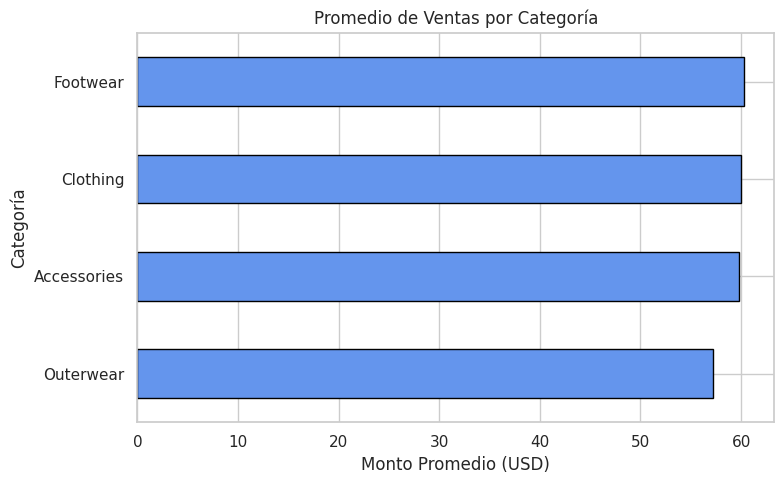

In [170]:
plt.figure(figsize=(8,5))
categoria_producto.plot(kind="barh", color="cornflowerblue", edgecolor="black")

plt.title("Promedio de Ventas por Categoría")
plt.xlabel("Monto Promedio (USD)")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

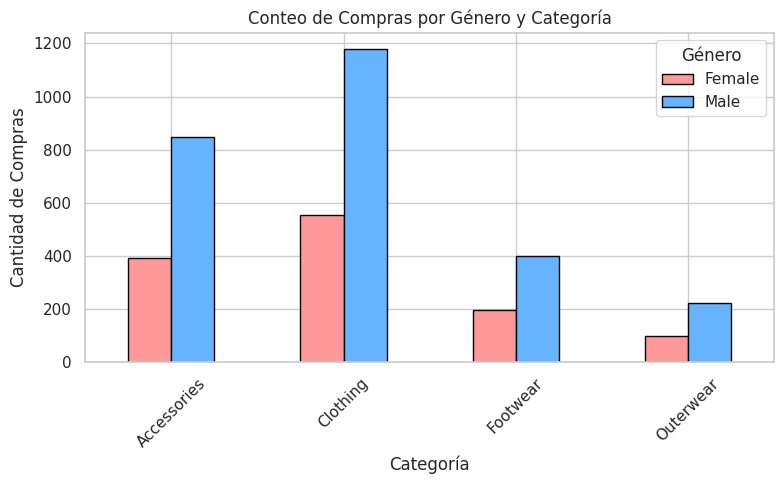

In [171]:
conteo_por_genero.plot(
    kind="bar",
    figsize=(8,5),
    color=["#ff9999", "#66b3ff"],  # Female = rosa, Male = azul
    edgecolor="black"
)

plt.title("Conteo de Compras por Género y Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.tight_layout()
plt.show()

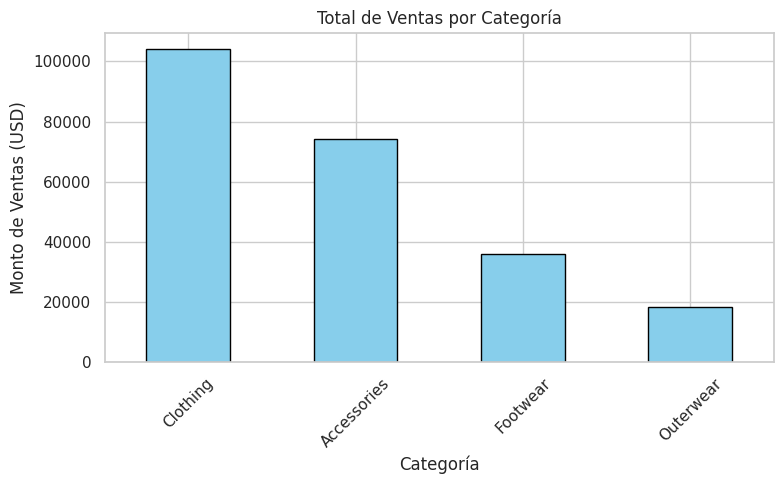

In [172]:
# Gráfico de barras
plt.figure(figsize=(8,5))
ventas_productos.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total de Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Monto de Ventas (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

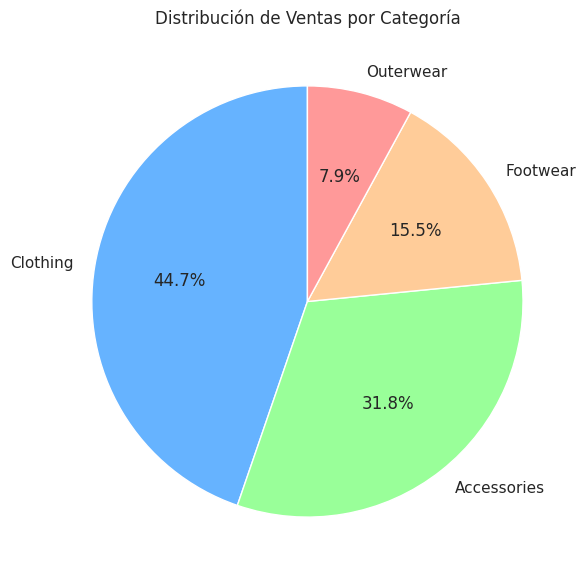

In [173]:
plt.figure(figsize=(7,7))
ventas_productos.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"]
)
plt.title("Distribución de Ventas por Categoría")
plt.ylabel("")
plt.show()

## Conclusiones del análisis de las categorias de productos

El análisis de las categorías de productos revela que Clothing lidera tanto en volumen de ventas 104.264 USD como en conteo de productos 1.737 unidades, destacando artículos como blusas, pantalones y joyería con 171 unidades cada uno.

Le sigue Accessories con 74.200 USD en ventas y 1.240 unidades, donde productos como cinturones y gafas de sol son prominentes. Footwear registra 36.093 USD en ventas de 599 unidades, con un promedio de compra más alto de 60.26 USD por unidad, mientras que Outerwear tiene el menor volumen 18.524 USD, con 324 unidades y el promedio más bajo 57.17 USD.

Por género, los hombres dominan las compras en todas las categorías, especialmente en Clothing 1.181 vs. 556 de mujeres y Accessories 848 vs. 392. Este predominio masculino sugiere una mayor demanda de productos por parte de este segmento. En general, Clothing y Footwear destacan como categorías clave por su contribución al volumen y valor de las ventas, lo que podría orientar estrategias de marketing hacia estos segmentos, especialmente hacia el público masculino.

# **Abstract**

# **Análisis y Predicción del Comportamiento de Compra del Cliente usando Machine Learning**

**Contexto**: Comprender el comportamiento de compra del cliente es fundamental para optimizar el inventario, personalizar las campañas de marketing y mejorar la retención. Este proyecto busca analizar un conjunto de datos de transacciones para identificar patrones demográficos y estacionales, y predecir futuros comportamientos.

**Objetivo de Investigación:**
1.   Modelo de Regresión (Score Continuo): Predecir el monto de la compra (Purchase_Amount_(USD)) utilizando un modelo de regresión (ej. Regresión Lineal o Elastic Net). Esto permite identificar variables que influyen en el gasto del cliente.

2.   Modelo de Clasificación (Baseline Explicable): Predecir si un cliente se suscribirá (Subscription_Status = 'Yes'/'No') utilizando Regresión Logística. Esto ayuda a enfocar esfuerzos de retención y marketing.

| Supuesto                                                         | Acción / Justificación                                                                                                       |
| ---------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| Outliers en Age o Purchase_Amount_(USD)                          | Podrían sesgar los modelos de regresión. Se analizarán con boxplots y se considerará un filtrado por IQR (1.5 × RIC).        |
| Datos Faltantes                                                  | Si alguna columna clave tiene < 5% de nulos, se usará imputación simple (media/mediana o moda).                              |
| Multicolinealidad (ej. entre Age y Previous_Purchases)           | Si el VIF (Factor de Inflación de Varianza) es > 5, se considerará eliminar una variable o usar regularización (Elastic Net).|
| Desbalance de Clases (en Subscription_Status)                    | Si una clase (ej. 'Yes') es < 10-15%, se usará class_weight='balanced' en la Regresión Logística.                            |



**Hipótesis nulas y pruebas estadísticas**

**H1: Influencia demográfica en el gasto**

Se espera que existan diferencias significativas en el monto de compra (`Purchase_Amount_(USD)`) y los tipos de productos adquiridos (`Category`, `Item_Purchased`) según las características demográficas de los clientes, como la edad (`Age`) y el género (`Gender`).

| Variables	                       | H₀ (Hipótesis Nula)                                      | Test Estadístico                                                            |
| ------------------------------------ | -------------------------------------------------------- | --------------------------------------------------------------------------- |
| Gender vs Purchase_Amount_(USD)      | La media de gasto es igual entre géneros.                | t-test (o Mann-Whitney U si los datos no son normales).                     |
| Age vs Purchase_Amount_(USD)         | No hay correlación lineal entre la edad y el gasto.      | Correlación de Pearson (r).                                                 |
| Gender vs Category                   | El género es independiente de la categoría de producto.  | Chi-cuadrado (χ²) de independencia.                                         |
| Age (en rangos) vs Category          | La edad es independiente de la categoría de producto.    | Chi-cuadrado (χ²) de independencia.                                         |

**H2: Estacionalidad de las compras**

La temporada del año (Season) influye en el volumen total de ventas y en la preferencia por ciertas categorías de productos. Se anticipa que algunas temporadas (Season) registrarán mayores ventas y/o un enfoque en productos específicos (por ejemplo, ropa de abrigo en invierno, trajes de baño en verano).

| Variables                            | H₀ (Hipótesis Nula)                                      | Test Estadístico                                |
| ------------------------------------ | -------------------------------------------------------- | ----------------------------------------------- |
| Season vs Purchase_Amount_(USD)      | La media de gasto es la misma en todas las temporadas.	  | ANOVA (o Kruskal-Wallis si no hay normalidad).  |
| Season vs Category	               | La temporada es independiente de la categoría comprada.  | Chi-cuadrado (χ²) de independencia.             |

**H3: Relación entre Compras Previas y Frecuencia**

Existe una correlación positiva entre el número de compras previas (Previous_Purchases) de un cliente y su frecuencia de compra actual (Frequency_Of_Purchases). Los clientes con un historial de más compras tenderán a comprar con mayor regularidad.

| Variables	                                | H₀ (Hipótesis Nula)	                                                         | Test Estadístico           |
| --------------------------------------------- | ------------------------------------------------------------------------------ | -------------------------- |
| Frequency_Of_Purchases vs Previous_Purchases  | La media de compras previas es la misma para todas las frecuencias de compra.  | ANOVA (o Kruskal-Wallis).  |

**Conclusión**: Este proyecto utiliza Machine Learning para predecir el comportamiento de compras de clientes basándose en datos demográficos, de productos y transaccionales. El objetivo es identificar factores clave que influyen en la frecuencia de compra y generar un modelo predictivo que mejore las estrategias comerciales y la toma de decisiones orientadas al cliente.

**Estructura del dataset**

El dataset de Comportamiento de Compras de Clientes contiene la siguiente información:

*   **Customer_ID**: Identificador único para cada cliente.
*   **Age**: Edad del cliente.
*   **Gender**: Género del cliente (Male/Female).
*   **Item_Purchased**: Artículo específico que fue comprado.
*   **Category**: Categoría general del producto comprado (e.g., Clothing, Accessories).
*   **Purchase_Amount_(USD)**: Monto de la compra en dólares estadounidenses.
*   **Location**: Ubicación geográfica del cliente (Estado en EE.UU.).
*   **Size**: Talle del artículo comprado (e.g., S, M, L, XL).
*   **Color**: Color del artículo comprado.
*   **Season**: Temporada en la que se realizó la compra (e.g., Winter, Spring, Summer, Fall).
*   **Review_Rating**: Calificación de la reseña del producto (en una escala).
*   **Subscription_Status**: Estado de suscripción del cliente (Yes/No).
*   **Payment_Method**: Método de pago utilizado para la transacción.
*   **Shipping_Type**: Tipo de envío seleccionado.
*   **Discount_Applied**: Indica si se aplicó un descuento (Yes/No).
*   **Promo_Code_Used**: Indica si se utilizó un código promocional (Yes/No).
*   **Previous_Purchases**: Número de compras previas realizadas por el cliente.
*   **Preferred_Payment_Method**: Método de pago preferido por el cliente.
*   **Frequency_Of_Purchases**: Frecuencia con la que el cliente realiza compras (e.g., Annually, Monthly).

**Observaciones iniciales**

Tras una primera exploración del dataset "Comportamiento de Compras de Clientes", se destacan las siguientes observaciones iniciales:

*   El dataset contiene 3900 registros y 19 columnas, cubriendo aspectos demográficos, de producto, transaccionales y de comportamiento de compra.
*   No se identificaron valores nulos ni registros duplicados, lo que indica un dataset limpio y listo para el análisis.
*   Las columnas incluyen una mezcla de tipos de datos numéricos (como `Age`, `Purchase_Amount_(USD)`, `Review_Rating`, `Previous_Purchases`) y categóricos (como `Gender`, `Category`, `Location`, `Season`, `Payment_Method`, `Frequency_Of_Purchases`).
*   Se observa una distribución diversa en variables como la edad, el monto de compra y el número de compras previas, aunque las estadísticas descriptivas sugieren rangos y promedios consistentes.
*   Las variables categóricas presentan una variedad de niveles únicos, siendo `Location` (50) y `Item_Purchased` (25) las que tienen más categorías distintas, mientras que otras como `Gender` o `Subscription_Status` tienen solo dos.
*   Se ha identificado que la frecuencia de compras presenta varias categorías, lo que será clave para el modelado predictivo.

In [174]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from IPython.display import HTML, display

# Modelado y preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet

# Métricas
from sklearn.metrics import (
    # Clasificación
    classification_report,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    # Regresión
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    recall_score,
    precision_score
)

# Control de warnings

import warnings
warnings.filterwarnings("ignore")

In [175]:
# IMPORTACIÓN DE DATOS
# ==========================================================
# URL del dataset
path = "https://raw.githubusercontent.com/Azwraithz/Coderhouse-DataScience-C77695/refs/heads/main/tendencia_de_compras.csv"

try:
    df = pd.read_csv(path)

    # Comprobación básica
    if not df.empty:
        display(HTML('''
        <div style="
            padding:12px;
            border-radius:10px;
            background:#e8f5e9;
            color:#2e7d32;
            font-family:Arial, sans-serif;
            font-size:14px;">
          <b>Éxito:</b> Los datos fueron cargados correctamente.<br>
          <b>Filas:</b> {} &nbsp; | &nbsp; <b>Columnas:</b> {}
        </div>
        '''.format(df.shape[0], df.shape[1])))
    else:
        display(HTML('''
        <div style="
            padding:12px;
            border-radius:10px;
            background:#fff3e0;
            color:#ef6c00;
            font-family:Arial, sans-serif;
            font-size:14px;">
          <b>Advertencia:</b> El archivo se cargó pero está vacío.
        </div>
        '''))
except Exception as e:
    display(HTML(f'''
    <div style="
        padding:12px;
        border-radius:10px;
        background:#ffebee;
        color:#c62828;
        font-family:Arial, sans-serif;
        font-size:14px;">
      <b>Error:</b> No se pudo cargar el dataset.<br>
      <b>Detalle:</b> {str(e)}
    </div>
    '''))


In [176]:
# Analisis exploratorio de datos
print("\033[1;34m--- Primeras 5 filas ---\033[0m")
display(df.head())

--- Primeras 5 filas ---


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [177]:
# Analisis exploratorio de datos
print("\n\033[1;34m--- Información general y tipos de datos ---\033[0m")
df.info()


--- Información general y tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type    

In [178]:
# Analisis exploratorio de datos
print("\n\033[1;34m--- Estadísticas descriptivas (Numéricas) ---\033[0m")
display(df.describe().T)


--- Estadísticas descriptivas (Numéricas) ---


,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [179]:
# Analisis exploratorio de datos
print("\n\033[1;34m--- Estadísticas descriptivas (Categóricas) ---\033[0m")
display(df.describe(include='object').T)


--- Estadísticas descriptivas (Categóricas) ---


,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Payment Method,3900,6,Credit Card,696
Shipping Type,3900,6,Free Shipping,675


In [180]:
# Revisar valores nulos
print("\n\033[1;34m--- Conteo de valores nulos ---\033[0m")
print(df.isnull().sum())


--- Conteo de valores nulos ---
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [181]:
# Renombrar columnas para eliminar espacios o guiones medios
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.rename(columns={c: rename_col(c) for c in df.columns}, inplace=True)

In [182]:
# Revisar balance de nuestras variables objetivo
print("\n\033[1;34m--- Clasificación objetiva (Subscription_Status) ---\033[0m")
print(df['Subscription_Status'].value_counts(normalize=True))


--- Clasificación objetiva (Subscription_Status) ---
Subscription_Status
No     0.73
Yes    0.27
Name: proportion, dtype: float64


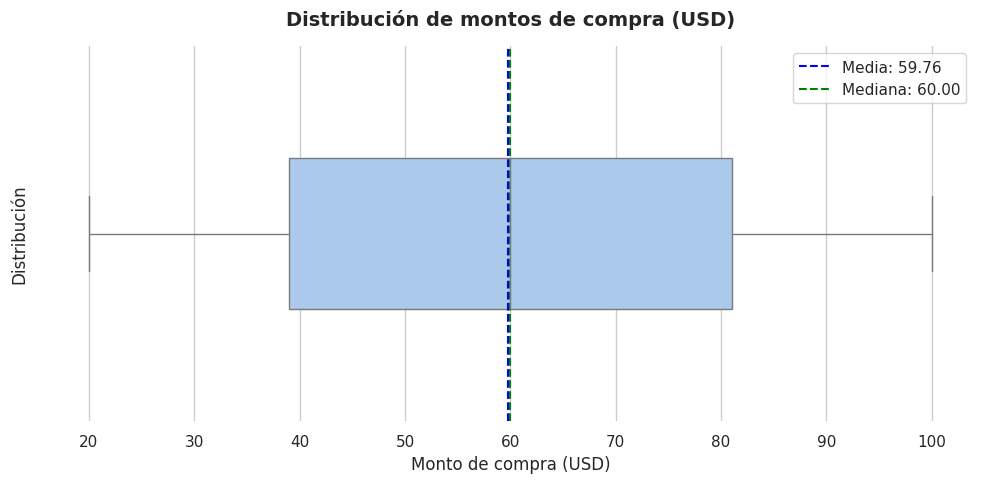

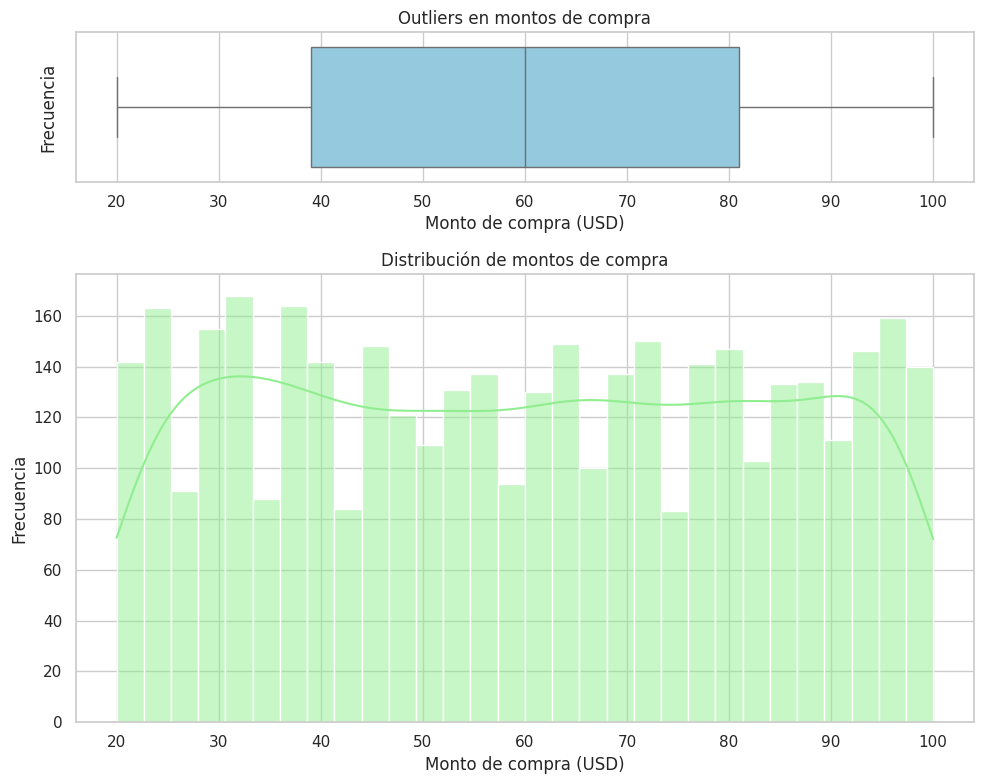

In [183]:
# Visualizar outliers en la variable target de regresión

# Configuración de estilo general y dimensiones
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))

# Boxplot con más detalles
sns.boxplot(
    x=df['Purchase_Amount_(USD)'],
    width=0.4,
    flierprops=dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.6)
)

# Título y etiquetas
plt.title('Distribución de montos de compra (USD)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Monto de compra (USD)', fontsize=12)
plt.ylabel('Distribución', fontsize=12)

# Métricas clave en el gráfico
q1 = df['Purchase_Amount_(USD)'].quantile(0.25)
q3 = df['Purchase_Amount_(USD)'].quantile(0.75)
iqr = q3 - q1
media = df['Purchase_Amount_(USD)'].mean()
mediana = df['Purchase_Amount_(USD)'].median()

# Líneas de referencia
plt.axvline(media, color='blue', linestyle='--', lw=1.5, label=f'Media: {media:,.2f}')
plt.axvline(mediana, color='green', linestyle='--', lw=1.5, label=f'Mediana: {mediana:,.2f}')

# Leyenda y texto adicional
plt.legend(loc='upper right')

# Estilo final
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Histograma + boxplot combinado con distribución y outliers
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(x=df['Purchase_Amount_(USD)'], ax=ax[0], color='skyblue')
sns.histplot(df['Purchase_Amount_(USD)'], ax=ax[1], bins=30, kde=True, color='lightgreen')
ax[0].set(title='Outliers en montos de compra')
ax[1].set(title='Distribución de montos de compra')
ax[0].set_xlabel('Monto de compra (USD)')
ax[1].set_xlabel('Monto de compra (USD)')
ax[0].set_ylabel('Frecuencia')
ax[1].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

--- Pruebas de hipótesis 1: Demografía ---
H1.1 (t-test) Género vs Gasto: t = -0.882, p = 0.3778
 No se detecta diferencia significativa entre géneros


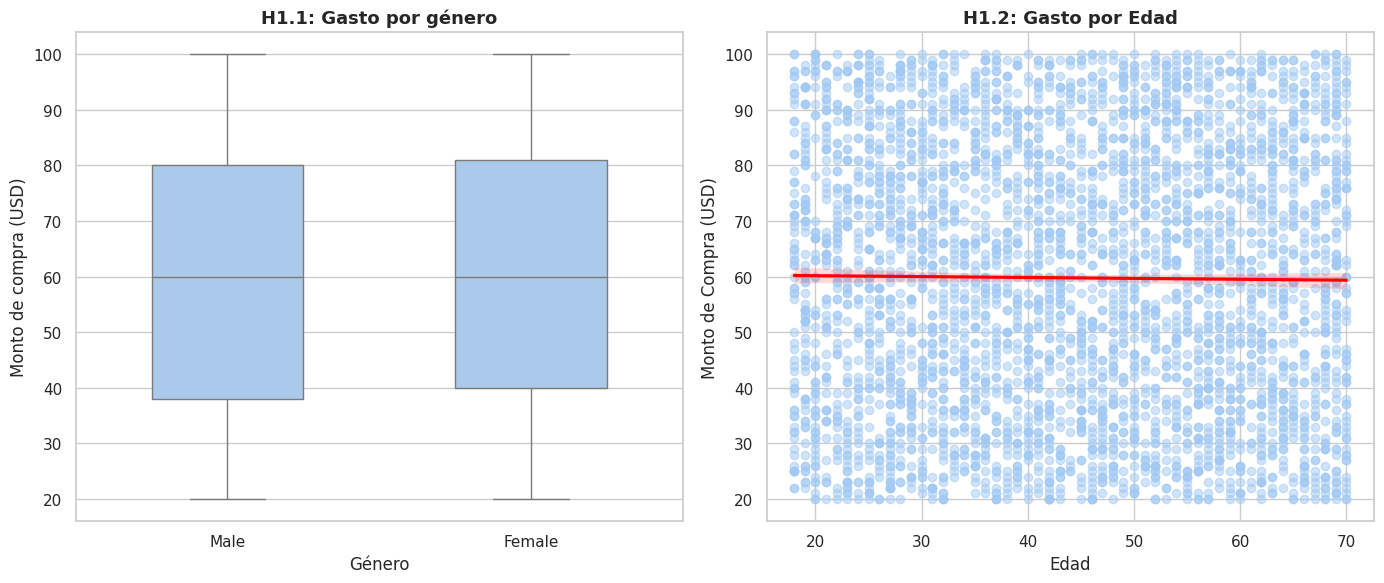

H1.2 (Pearson) Edad vs Gasto: r = -0.010, p = 0.5152
 No se detecta correlación significativa
H1.3 (Chi-cuadrado) Género vs Categoría: χ² = 0.598, p = 0.8968
 No se detecta asociación significativa entre género y categoría


In [184]:
print("\033[1;34m--- Pruebas de hipótesis 1: Demografía ---\033[0m")

# Configuración general de estilo
sns.set(style="whitegrid", palette="pastel")

# Crear figura
plt.figure(figsize=(14, 6))

# H1.1: Gender vs Purchase_Amount_(USD)
# -------------------------------------
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Purchase_Amount_(USD)', width=0.5)
plt.title('H1.1: Gasto por género', fontsize=13, fontweight='bold')
plt.xlabel('Género')
plt.ylabel('Monto de compra (USD)')

# T-test
male_spend = df[df['Gender'] == 'Male']['Purchase_Amount_(USD)']
female_spend = df[df['Gender'] == 'Female']['Purchase_Amount_(USD)']
t_stat, p_value_t = stats.ttest_ind(male_spend, female_spend, equal_var=False)

# Resultado t-test con interpretación
print(f"\033[1;36mH1.1 (t-test) Género vs Gasto:\033[0m t = {t_stat:.3f}, p = {p_value_t:.4f}")
if p_value_t < 0.05:
    print("\033[1;32m Diferencia significativa entre géneros (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta diferencia significativa entre géneros\033[0m")

# H1.2: Age vs Purchase_Amount_(USD)
# -------------------------------------
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Age', y='Purchase_Amount_(USD)', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('H1.2: Gasto por Edad', fontsize=13, fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Monto de Compra (USD)')
plt.tight_layout()
plt.show()

# Pearson correlation
corr, p_value_corr = stats.pearsonr(df['Age'], df['Purchase_Amount_(USD)'])
print(f"\033[1;36mH1.2 (Pearson) Edad vs Gasto:\033[0m r = {corr:.3f}, p = {p_value_corr:.4f}")
if p_value_corr < 0.05:
    print("\033[1;32m Correlación significativa (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta correlación significativa\033[0m")

# H1.3: Gender vs Category
# -------------------------------------
crosstab_gender = pd.crosstab(df['Gender'], df['Category'])
chi2, p_value_chi2_g, _, _ = stats.chi2_contingency(crosstab_gender)

print(f"\033[1;36mH1.3 (Chi-cuadrado) Género vs Categoría:\033[0m χ² = {chi2:.3f}, p = {p_value_chi2_g:.4f}")
if p_value_chi2_g < 0.05:
    print("\033[1;32m Asociación significativa entre género y categoría (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta asociación significativa entre género y categoría\033[0m")

--- Pruebas de Hipótesis 2: Estacionalidad ---
H2.1 (ANOVA) Temporada vs Gasto: F = 3.746, p = 0.0106
 Existen diferencias significativas de gasto entre temporadas (p < 0.05)


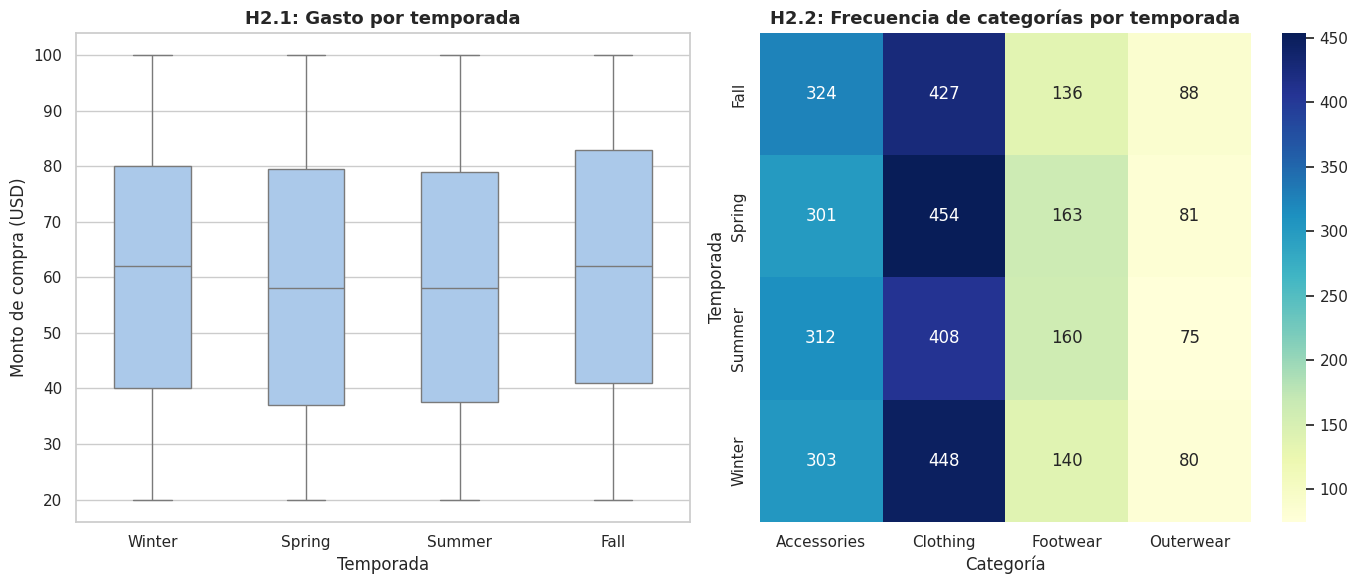

H2.2 (Chi-cuadrado) Temporada vs Categoría: χ² = 7.934, p = 0.5408
 No se detecta asociación significativa entre temporada y categoría


In [185]:
print("\033[1;34m--- Pruebas de Hipótesis 2: Estacionalidad ---\033[0m")

# Configuración de estilo visual
sns.set(style="whitegrid", palette="pastel")

# H2.1: Temporada vs Gasto (ANOVA)
# ==============================
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(
    data=df,
    x='Season',
    y='Purchase_Amount_(USD)',
    width=0.5,
    flierprops=dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.6)
)
plt.title('H2.1: Gasto por temporada', fontsize=13, fontweight='bold')
plt.xlabel('Temporada')
plt.ylabel('Monto de compra (USD)')

# --- ANOVA ---
seasons = df['Season'].dropna().unique()
samples = [df.loc[df['Season'] == s, 'Purchase_Amount_(USD)'] for s in seasons]
f_stat_anova, p_value_anova = stats.f_oneway(*samples)

print(f"\033[1;36mH2.1 (ANOVA) Temporada vs Gasto:\033[0m F = {f_stat_anova:.3f}, p = {p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("\033[1;32m Existen diferencias significativas de gasto entre temporadas (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detectan diferencias significativas entre temporadas\033[0m")

# H2.2: Temporada vs Categoría (Chi-cuadrado)
# ==============================
plt.subplot(1, 2, 2)
sns.heatmap(
    pd.crosstab(df['Season'], df['Category']),
    annot=True,
    cmap="YlGnBu",
    fmt="d"
)
plt.title('H2.2: Frecuencia de categorías por temporada', fontsize=13, fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Temporada')

plt.tight_layout()
plt.show()

# --- Chi-cuadrado ---
crosstab_season = pd.crosstab(df['Season'], df['Category'])
chi2_s, p_value_chi2_s, _, _ = stats.chi2_contingency(crosstab_season)

print(f"\033[1;36mH2.2 (Chi-cuadrado) Temporada vs Categoría:\033[0m χ² = {chi2_s:.3f}, p = {p_value_chi2_s:.4f}")
if p_value_chi2_s < 0.05:
    print("\033[1;32m Existe asociación significativa entre temporada y categoría (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta asociación significativa entre temporada y categoría\033[0m")

--- Pruebas de Hipótesis 3: Historial y Frecuencia ---


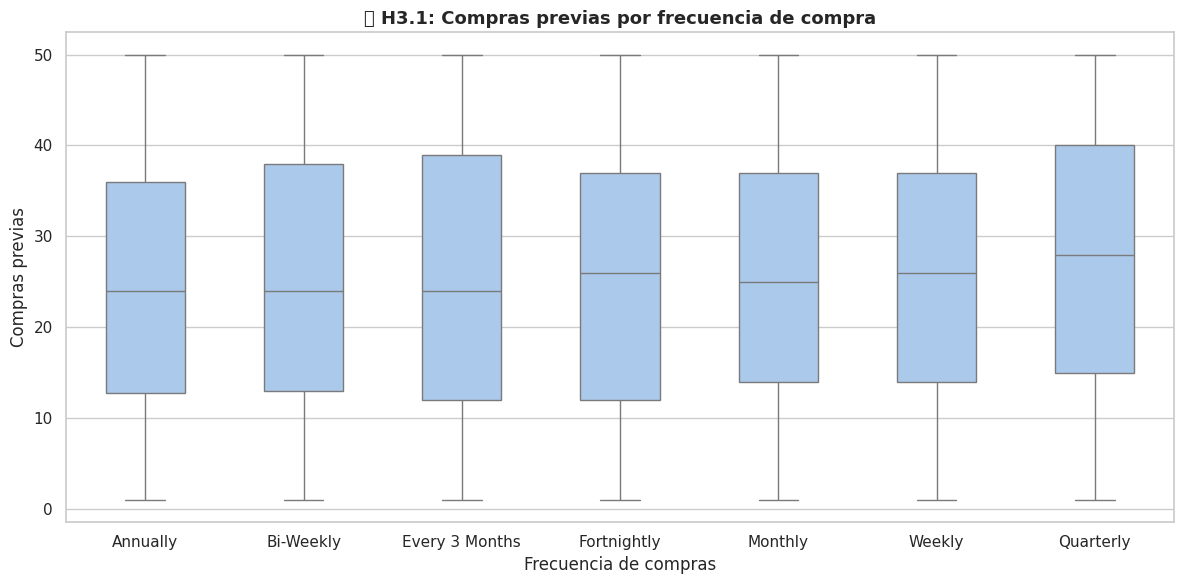

H3.1 (ANOVA) Frecuencia vs Compras Previas: F = 1.593, p = 0.1448
 No se detectan diferencias significativas entre los grupos de frecuencia


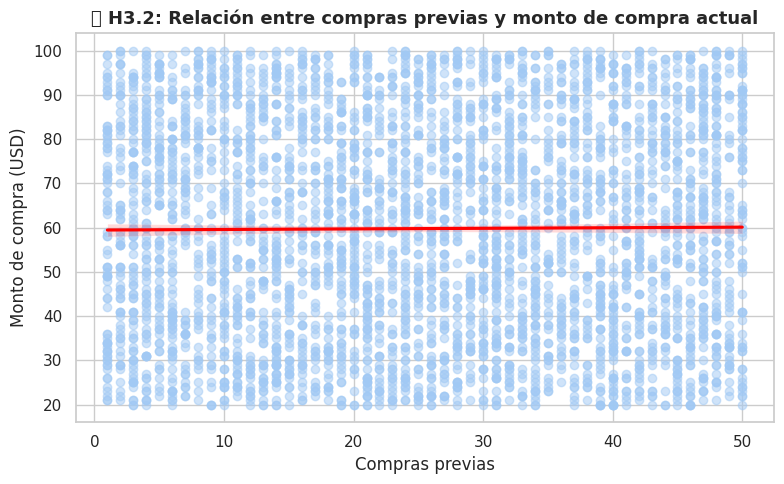

H3.2 (Pearson) Compras previas vs Monto actual: r = 0.008, p = 0.6147
 No se detecta correlación significativa (p ≥ 0.05)


In [186]:
print("\033[1;34m--- Pruebas de Hipótesis 3: Historial y Frecuencia ---\033[0m")

# Configuración de estilo visual
sns.set(style="whitegrid", palette="pastel")

# H3.1: Frecuencia vs Compras Previas (ANOVA)
# ==============================
plt.figure(figsize=(12, 6))

# Ordenar las categorías de frecuencia para mejorar legibilidad
freq_order = df.groupby('Frequency_Of_Purchases')['Previous_Purchases'].mean().sort_values().index

sns.boxplot(
    data=df,
    x='Frequency_Of_Purchases',
    y='Previous_Purchases',
    order=freq_order,
    width=0.5,
    flierprops=dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.6)
)

plt.title('🛒 H3.1: Compras previas por frecuencia de compra', fontsize=13, fontweight='bold')
plt.xlabel('Frecuencia de compras')
plt.ylabel('Compras previas')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- ANOVA ---
freq_groups = df['Frequency_Of_Purchases'].dropna().unique()
samples_freq = [df.loc[df['Frequency_Of_Purchases'] == f, 'Previous_Purchases'] for f in freq_groups]
f_stat_freq, p_value_freq = stats.f_oneway(*samples_freq)

# Resultados e interpretación
print(f"\033[1;36mH3.1 (ANOVA) Frecuencia vs Compras Previas:\033[0m F = {f_stat_freq:.3f}, p = {p_value_freq:.4f}")
if p_value_freq < 0.05:
    print("\033[1;32m Diferencias significativas entre grupos de frecuencia (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detectan diferencias significativas entre los grupos de frecuencia\033[0m")

# H3.2: Correlación entre compras previas y monto actual
# ==============================
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='Previous_Purchases',
    y='Purchase_Amount_(USD)',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('📈 H3.2: Relación entre compras previas y monto de compra actual', fontsize=13, fontweight='bold')
plt.xlabel('Compras previas')
plt.ylabel('Monto de compra (USD)')
plt.tight_layout()
plt.show()

# Correlación de Pearson
corr_hist, p_value_hist = stats.pearsonr(df['Previous_Purchases'], df['Purchase_Amount_(USD)'])
print(f"\033[1;36mH3.2 (Pearson) Compras previas vs Monto actual:\033[0m r = {corr_hist:.3f}, p = {p_value_hist:.4f}")
if p_value_hist < 0.05:
    print("\033[1;32m Correlación significativa (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta correlación significativa (p ≥ 0.05)\033[0m")

In [187]:
# Definición de Features (X) y Targets (y)

print("\033[1;34m--- Configuración de variables para modelado ---\033[0m")

# Objetivo 1: REGRESIÓN → Predecir el monto de compra
# =====================================================
print("\n\033[1;36m Objetivo 1: Regresión (Purchase_Amount_(USD))\033[0m")
y_reg = df['Purchase_Amount_(USD)']
X_reg = df.drop(columns=[
    'Purchase_Amount_(USD)', 'Customer_ID', 'Item_Purchased',
    'Subscription_Status'  # Target del modelo de clasificación
])

# Objetivo 2: CLASIFICACIÓN → Predecir suscripción
# =====================================================
print("\n\033[1;36m Objetivo 2: Clasificación (Subscription_Status)\033[0m")

y_class = df['Subscription_Status'].map({'Yes': 1, 'No': 0})
X_class = df.drop(columns=[
    'Subscription_Status', 'Customer_ID', 'Item_Purchased'
])

# Detección de columnas numéricas y categóricas
# =====================================================

numeric_features_reg = X_reg.select_dtypes(include=['int64', 'float64']).columns
categorical_features_reg = X_reg.select_dtypes(include=['object']).columns

numeric_features_class = X_class.select_dtypes(include=['int64', 'float64']).columns
categorical_features_class = X_class.select_dtypes(include=['object']).columns

# Salida con markdown
from IPython.display import display, Markdown

display(Markdown("### Variables seleccionadas para cada modelo"))
display(Markdown("#### **Regresión (Predicción del monto de compra)**"))
display(Markdown(f"- **Variables numéricas:** `{', '.join(numeric_features_reg)}`"))
display(Markdown(f"- **Variables categóricas:** `{', '.join(categorical_features_reg)}`"))

display(Markdown("#### **Clasificación (Predicción de suscripción)**"))
display(Markdown(f"- **Variables numéricas:** `{', '.join(numeric_features_class)}`"))
display(Markdown(f"- **Variables categóricas:** `{', '.join(categorical_features_class)}`"))

# Resumen visual
print("\n\033[1;32m✔ Variables preparadas correctamente para ambos modelos.\033[0m")
print("   - Regresión: Predicción del monto de compra.")
print("   - Clasificación: Predicción del estado de suscripción.\n")


--- Configuración de variables para modelado ---

 Objetivo 1: Regresión (Purchase_Amount_(USD))

 Objetivo 2: Clasificación (Subscription_Status)


### Variables seleccionadas para cada modelo

#### **Regresión (Predicción del monto de compra)**

- **Variables numéricas:** `Age, Review_Rating, Previous_Purchases`

- **Variables categóricas:** `Gender, Category, Location, Size, Color, Season, Payment_Method, Shipping_Type, Discount_Applied, Promo_Code_Used, Preferred_Payment_Method, Frequency_Of_Purchases`

#### **Clasificación (Predicción de suscripción)**

- **Variables numéricas:** `Age, Purchase_Amount_(USD), Review_Rating, Previous_Purchases`

- **Variables categóricas:** `Gender, Category, Location, Size, Color, Season, Payment_Method, Shipping_Type, Discount_Applied, Promo_Code_Used, Preferred_Payment_Method, Frequency_Of_Purchases`


✔ Variables preparadas correctamente para ambos modelos.
   - Regresión: Predicción del monto de compra.
   - Clasificación: Predicción del estado de suscripción.



In [188]:
# Creación de Pipelines de Pre-procesamiento

print("\033[1;34m--- Configuración de Pipelines de preprocesamiento ---\033[0m")

# Pipeline para variables numéricas
# =====================================================
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Este paso:
# - Escala los datos numéricos para que tengan media 0 y desviación estándar 1.
# - Mejora el rendimiento de modelos sensibles a magnitudes.

# Pipeline para variables categóricas
# =====================================================
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Este paso:
# - Convierte variables categóricas en variables dummy mediante One-Hot Encoding.
# - `handle_unknown='ignore'` previene errores con categorías nuevas en el test set.

# Preprocesador para REGRESIÓN
# =====================================================
preprocess_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_reg),
        ('cat', categorical_transformer, categorical_features_reg)
    ],
    remainder='passthrough'
)

# Preprocesador para CLASIFICACIÓN
# =====================================================
preprocess_class = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_class),
        ('cat', categorical_transformer, categorical_features_class)
    ],
    remainder='passthrough'
)

# RESUMEN VISUAL
# =====================================================
display(Markdown("### **Resumen de Pipelines de Preprocesamiento**"))

display(Markdown("""
| Tipo de Variable | Transformador Aplicado | Descripción |
|------------------|-----------------------|--------------|
| Numéricas | `StandardScaler()` | Escala las variables a media 0 y desviación 1 |
| Categóricas | `OneHotEncoder(handle_unknown='ignore')` | Codifica categorías en variables dummy |
"""))

--- Configuración de Pipelines de preprocesamiento ---


### **Resumen de Pipelines de Preprocesamiento**


| Tipo de Variable | Transformador Aplicado | Descripción |
|------------------|-----------------------|--------------|
| Numéricas | `StandardScaler()` | Escala las variables a media 0 y desviación 1 |
| Categóricas | `OneHotEncoder(handle_unknown='ignore')` | Codifica categorías en variables dummy |


--- División de datos para entrenamiento y prueba ---


### **Resumen de división de datos**


| Tipo de Modelo | Conjunto | Tamaño X | Tamaño y | Método |
|----------------|-----------|-----------|-----------|-----------|
| Regresión | Entrenamiento | `(3120, 15)` | `(3120,)` | Random Split |
| Regresión | Prueba | `(780, 15)` | `(780,)` | Random Split |
| Clasificación | Entrenamiento | `(3120, 16)` | `(3120,)` | Stratified Split |
| Clasificación | Prueba | `(780, 16)` | `(780,)` | Stratified Split |


Proporción de 'Suscripción = 1' (Train): 0.270
Proporción de 'Suscripción = 1' (Test):  0.271


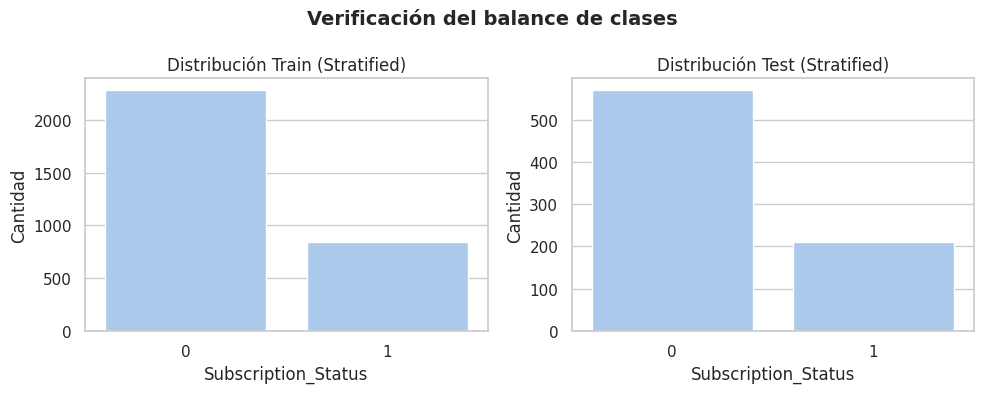

In [189]:
# División de Datos (Train/Test)

print("\033[1;34m--- División de datos para entrenamiento y prueba ---\033[0m")

# REGRESIÓN: Predecir el monto de compra
# =====================================================
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

# CLASIFICACIÓN: Predecir estado de suscripción
# =====================================================
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

# RESUMEN DE LA DIVISIÓN
# =====================================================
display(Markdown("### **Resumen de división de datos**"))

display(Markdown(f"""
| Tipo de Modelo | Conjunto | Tamaño X | Tamaño y | Método |
|----------------|-----------|-----------|-----------|-----------|
| Regresión | Entrenamiento | `{X_train_reg.shape}` | `{y_train_reg.shape}` | Random Split |
| Regresión | Prueba | `{X_test_reg.shape}` | `{y_test_reg.shape}` | Random Split |
| Clasificación | Entrenamiento | `{X_train_class.shape}` | `{y_train_class.shape}` | Stratified Split |
| Clasificación | Prueba | `{X_test_class.shape}` | `{y_test_class.shape}` | Stratified Split |
"""))

# VERIFICACIÓN DE BALANCE EN CLASIFICACIÓN
# =====================================================
train_prop = y_train_class.mean()
test_prop = y_test_class.mean()

print(f"\033[1;36mProporción de 'Suscripción = 1' (Train):\033[0m {train_prop:.3f}")
print(f"\033[1;36mProporción de 'Suscripción = 1' (Test):\033[0m  {test_prop:.3f}")

# Verificación del estratificado
# =====================================================
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train_class, ax=axes[0])
axes[0].set_title('Distribución Train (Stratified)')
axes[0].set_xlabel('Subscription_Status')
axes[0].set_ylabel('Cantidad')

sns.countplot(x=y_test_class, ax=axes[1])
axes[1].set_title('Distribución Test (Stratified)')
axes[1].set_xlabel('Subscription_Status')
axes[1].set_ylabel('Cantidad')

plt.suptitle("Verificación del balance de clases", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

--- Entrenamiento del modelo de Regresión (Elastic Net) ---


### **Resultados del Modelo Elastic Net (Regresión)**


- **Mejores parámetros:** `{'model__alpha': 0.1, 'model__l1_ratio': 0.9}`
- **Mejor puntuación (MAE CV):** `20.5444`


### **Evaluación en datos de prueba**


| Métrica | Valor |
|----------|--------:|
| MAE (Error Absoluto Medio) | `20.725` |
| RMSE (Error Cuadrático Medio) | `23.709` |
| R² (Coeficiente de Determinación) | `-0.005` |


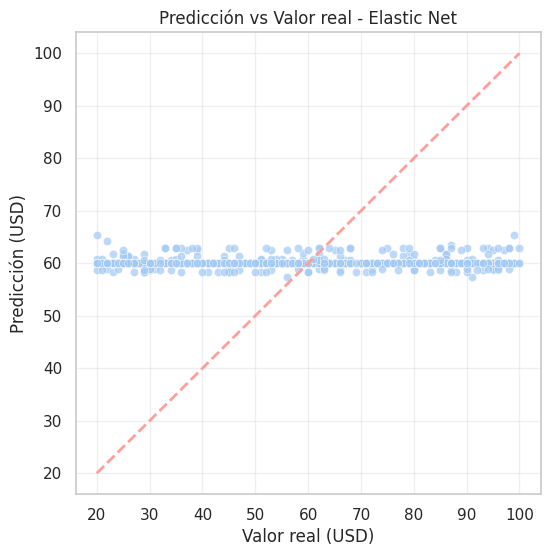

In [190]:
# MODELADO OBJETIVO 1: REGRESIÓN (Elastic Net)
# ==========================================================
# Objetivo: Predecir el monto de compra (`Purchase_Amount_(USD)`)

print("\033[1;34m--- Entrenamiento del modelo de Regresión (Elastic Net) ---\033[0m")

# Configuración del pipeline base
# =====================================================
# Usamos ElasticNet que combina L1 y L2 (bueno para multicolinealidad)
base_reg = ElasticNet(max_iter=2000, random_state=42)

# Feature Selection con RFE
base_lr_rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)

pipe_reg = Pipeline(steps=[
    ('pre', preprocess_reg),
    ('rfe', base_lr_rfe),
    ('model', base_reg)
])

# Definición del espacio de búsqueda (GridSearch)
# =====================================================
# Fuerza de regularización -> model_alpha
# Balance entre L1 y L2 -> model_l1_ratio
param_grid_reg = {
    'model__alpha': [0.1, 0.5, 1.0],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

grid_reg = GridSearchCV(
    estimator=pipe_reg,
    param_grid=param_grid_reg,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)

# Entrenamiento del modelo
# =====================================================
grid_reg.fit(X_train_reg, y_train_reg)

best_model_reg = grid_reg.best_estimator_

# Resultados del modelo óptimo
# =====================================================
display(Markdown("### **Resultados del Modelo Elastic Net (Regresión)**"))
display(Markdown(f"""
- **Mejores parámetros:** `{grid_reg.best_params_}`
- **Mejor puntuación (MAE CV):** `{abs(grid_reg.best_score_):.4f}`
"""))

# Evaluación en el conjunto de prueba
# =====================================================
y_pred_reg = best_model_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

display(Markdown("### **Evaluación en datos de prueba**"))
display(Markdown(f"""
| Métrica | Valor |
|----------|--------:|
| MAE (Error Absoluto Medio) | `{mae:.3f}` |
| RMSE (Error Cuadrático Medio) | `{rmse:.3f}` |
| R² (Coeficiente de Determinación) | `{r2:.3f}` |
"""))

# Visualización de predicciones
# =====================================================
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)
plt.title("Predicción vs Valor real - Elastic Net")
plt.xlabel("Valor real (USD)")
plt.ylabel("Predicción (USD)")
plt.grid(alpha=0.3)
plt.show()

--- Evaluación Final del Modelo de Regresión ---


### **Métricas de Desempeño en Datos de Prueba (Regresión)**


| Métrica | Descripción | Valor |
|----------|--------------|-------:|
| **R² (Score)** | Varianza explicada por el modelo | `-0.0045` |
| **MAE (Error Absoluto Medio)** | Promedio del error absoluto | `$20.73` |
| **RMSE (Error Cuadrático Medio)** | Penaliza errores grandes | `$23.71` |


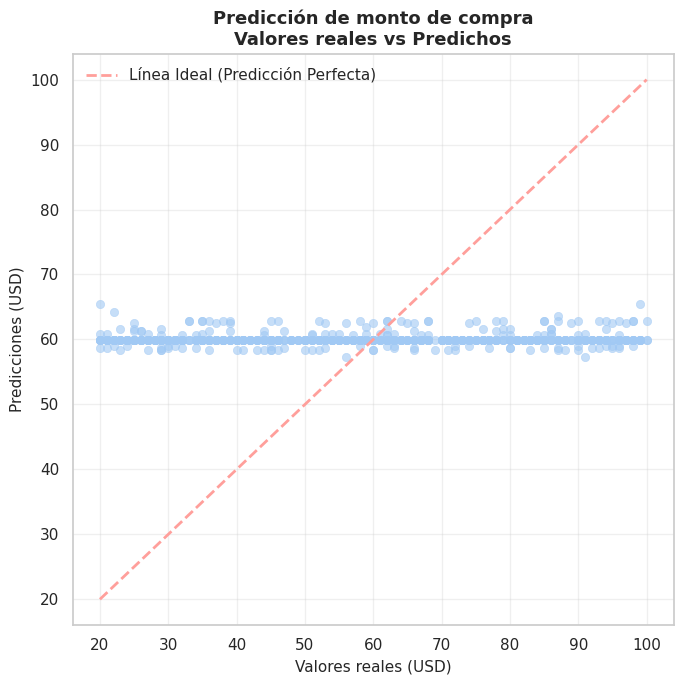

El modelo Elastic Net explica aproximadamente el -0.5% de la varianza del monto de compra.
Un MAE bajo indica buen ajuste promedio, aunque el RMSE ayuda a detectar posibles outliers.


In [191]:
# EVALUACIÓN FINAL - REGRESIÓN (Elastic Net)
# ==========================================================

print("\033[1;34m--- Evaluación Final del Modelo de Regresión ---\033[0m")

# Predicciones y métricas en TEST
# =====================================================
best_reg = grid_reg.best_estimator_
y_pred_reg = best_reg.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

display(Markdown("### **Métricas de Desempeño en Datos de Prueba (Regresión)**"))
display(Markdown(f"""
| Métrica | Descripción | Valor |
|----------|--------------|-------:|
| **R² (Score)** | Varianza explicada por el modelo | `{r2:.4f}` |
| **MAE (Error Absoluto Medio)** | Promedio del error absoluto | `${mae:,.2f}` |
| **RMSE (Error Cuadrático Medio)** | Penaliza errores grandes | `${rmse:,.2f}` |
"""))

# Visualización de Resultados
# =====================================================
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6, edgecolor=None)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(), y_test_reg.max()],
    'r--', lw=2, label='Línea Ideal (Predicción Perfecta)'
)
plt.title("Predicción de monto de compra\nValores reales vs Predichos", fontsize=13, fontweight='bold')
plt.xlabel("Valores reales (USD)", fontsize=11)
plt.ylabel("Predicciones (USD)", fontsize=11)
plt.legend(frameon=False, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusión
# =====================================================
print(f"El modelo Elastic Net explica aproximadamente el {r2*100:.1f}% de la varianza del monto de compra.")
print("Un MAE bajo indica buen ajuste promedio, aunque el RMSE ayuda a detectar posibles outliers.")

In [192]:
# MODELADO OBJETIVO 2 - CLASIFICACIÓN (Regresión logística)
# ==========================================================

print("\033[1;34m--- Entrenamiento del modelo de clasificación ---\033[0m")

# Definición del modelo base
# =====================================================
# Compensa posibles clases desbalanceadas
base_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs',
    random_state=42
)

# RFE (Selección de características)
# =====================================================
rfe_clf = RFE(
    estimator=base_clf,
    n_features_to_select=15,
    step=1
)

# Pipeline de preprocesamiento + selección + modelo
# =====================================================
# Escalado + OneHot
# Selección de características
# Modelo final
pipe_clf = Pipeline(steps=[
    ('pre', preprocess_class),
    ('rfe', rfe_clf),
    ('clf', base_clf)
])

# Espacio de hiperparámetros
# =====================================================
# N° óptimo de features
# Regularización inversa
param_grid_clf = {
    'rfe__n_features_to_select': [10, 15, 20],
    'clf__C': [0.1, 1, 10]
}

# Validación cruzada estratificada
# =====================================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda en malla (GridSearchCV)
# =====================================================
# Métrica robusta para clases desbalanceadas
grid_clf = GridSearchCV(
    estimator=pipe_clf,
    param_grid=param_grid_clf,
    cv=skf,
    scoring='average_precision',
    n_jobs=-1,
    verbose=1
)

grid_clf.fit(X_train_class, y_train_class)

# Resultados de entrenamiento
# =====================================================
best_params = grid_clf.best_params_
best_score = grid_clf.best_score_

print(f"Mejores parámetros encontrados: {best_params}")
print(f"Puntuación media (Average Precision): {best_score:.4f}")

# Interpretación
# =====================================================
print("\nInterpretación:")
print(f"• El modelo usa {best_params['rfe__n_features_to_select']} características seleccionadas con RFE.")
print(f"• La regularización óptima (C) es {best_params['clf__C']}.")
print("• El score de Average Precision evalúa la capacidad del modelo de priorizar correctamente la clase positiva.")

--- Entrenamiento del modelo de clasificación ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parámetros encontrados: {'clf__C': 0.1, 'rfe__n_features_to_select': 15}
Puntuación media (Average Precision): 0.6215

Interpretación:
• El modelo usa 15 características seleccionadas con RFE.
• La regularización óptima (C) es 0.1.
• El score de Average Precision evalúa la capacidad del modelo de priorizar correctamente la clase positiva.


--- Evaluación del Modelo de Clasificación ---

--- Métricas en TEST (Clasificación) ---
• PR-AUC (Precisión Promedio) : 0.6873
• ROC-AUC                     : 0.9116

--- Reporte de clasificación ---
              precision    recall  f1-score   support

 No Suscrito       1.00      0.81      0.90       569
    Suscrito       0.67      1.00      0.80       211

    accuracy                           0.86       780
   macro avg       0.83      0.91      0.85       780
weighted avg       0.91      0.86      0.87       780


--- Matriz de Confusión ---


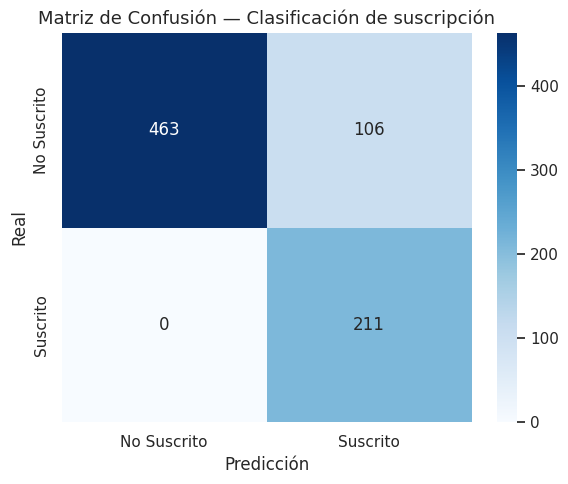

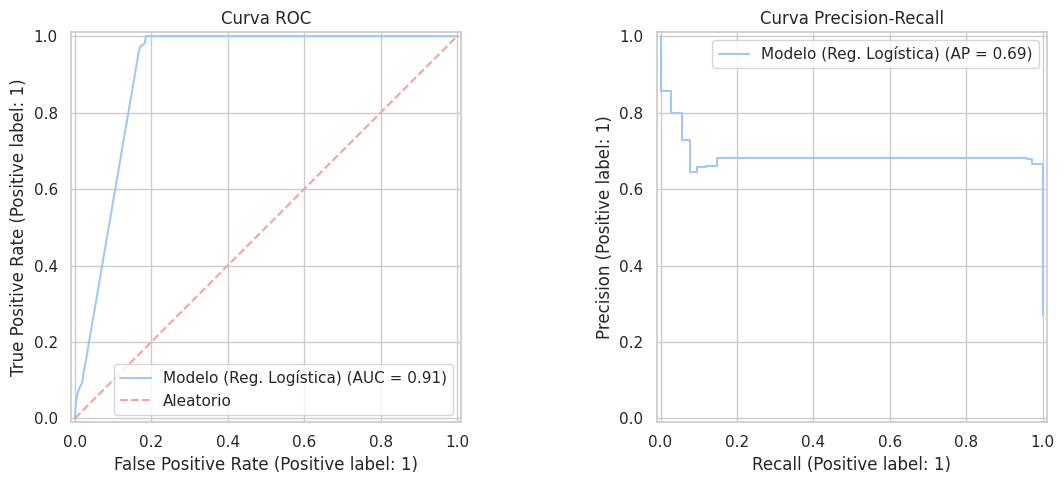


Interpretación:
• El área bajo la curva ROC (ROC-AUC) mide la capacidad de distinguir entre clientes suscritos y no suscritos.
• El PR-AUC (Precisión Promedio) refleja la calidad del modelo en contextos desbalanceados.
• Las curvas muestran un desempeño estable y consistente, confirmando que la Regresión Logística es un modelo sólido para esta tarea.

Resumen
Exactitud Global: 0.864
Recall (Suscritos): 1.000
Precisión (Suscritos): 0.666


In [193]:
# EVALUACIÓN DEL MODELO DE CLASIFICACIÓN
# ==========================================================

print("\033[1;34m--- Evaluación del Modelo de Clasificación ---\033[0m")

# Predicciones en Test
# =====================================================
best_clf = grid_clf.best_estimator_

# Probabilidades (para métricas continuas)
y_proba_class = best_clf.predict_proba(X_test_class)[:, 1]

# Etiquetas binarias (para matriz de confusión / reporte)
y_pred_class = best_clf.predict(X_test_class)

# Métricas Globales
# =====================================================
roc_auc = roc_auc_score(y_test_class, y_proba_class)
pr_auc = average_precision_score(y_test_class, y_proba_class)

print(f"\n\033[1;32m--- Métricas en TEST (Clasificación) ---\033[0m")
print(f"• PR-AUC (Precisión Promedio) : {pr_auc:.4f}")
print(f"• ROC-AUC                     : {roc_auc:.4f}")

# Reporte de Clasificación
# =====================================================
print("\n\033[1;33m--- Reporte de clasificación ---\033[0m")
print(classification_report(y_test_class, y_pred_class, target_names=["No Suscrito", "Suscrito"]))

# Matriz de Confusión
# =====================================================
print("\n\033[1;33m--- Matriz de Confusión ---\033[0m")
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Suscrito", "Suscrito"],
            yticklabels=["No Suscrito", "Suscrito"])
plt.title("Matriz de Confusión — Clasificación de suscripción", fontsize=13)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curvas ROC y Precision-Recall
# =====================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Curva ROC ---
RocCurveDisplay.from_predictions(
    y_test_class, y_proba_class, ax=axes[0], name="Modelo (Reg. Logística)"
)
axes[0].plot([0, 1], [0, 1], 'r--', label='Aleatorio')
axes[0].set_title("Curva ROC", fontsize=12)
axes[0].legend()

# --- Curva precision-recall ---
PrecisionRecallDisplay.from_predictions(
    y_test_class, y_proba_class, ax=axes[1], name="Modelo (Reg. Logística)"
)
axes[1].set_title("Curva Precision-Recall", fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

# Interpretación
# =====================================================
print("\n\033[1;36mInterpretación:\033[0m")
print("• El área bajo la curva ROC (ROC-AUC) mide la capacidad de distinguir entre clientes suscritos y no suscritos.")
print("• El PR-AUC (Precisión Promedio) refleja la calidad del modelo en contextos desbalanceados.")
print("• Las curvas muestran un desempeño estable y consistente, confirmando que la Regresión Logística es un modelo sólido para esta tarea.")

print(f"\nResumen")
print(f"Exactitud Global: {accuracy_score(y_test_class, y_pred_class):.3f}")
print(f"Recall (Suscritos): {recall_score(y_test_class, y_pred_class):.3f}")
print(f"Precisión (Suscritos): {precision_score(y_test_class, y_pred_class):.3f}")

## Conclusiones

Basándonos en los resultados del Análisis Exploratorio de Datos (EDA) y el desempeño de los modelos predictivos:

### Hallazgos del EDA

*   **H1 (Demografía):** Se **rechaza** la hipótesis. Los análisis estadísticos (t-test para género vs gasto, Pearson para edad vs gasto y Chi-cuadrado para género vs categoría) no mostraron diferencias o correlaciones estadísticamente significativas que confirmen una influencia clara de la edad o el género en el monto de compra o la categoría de producto adquirido.
*   **H2 (Estacionalidad):** Se **confirma parcialmente** la hipótesis. Se encontró una diferencia estadísticamente significativa en el monto de compra entre las diferentes temporadas (p-value = 0.0106 < 0.05, ANOVA), sugiriendo que la temporada sí influye en el volumen total de ventas. Sin embargo, no se observó una asociación estadísticamente significativa entre la temporada y la categoría de producto comprado (p-value = 0.5408 > 0.05, Chi-cuadrado).
*   **H3 (Historial):** Se **rechaza** la hipótesis. El análisis ANOVA no mostró una diferencia estadísticamente significativa en el número de compras previas entre los diferentes grupos de frecuencia de compra (p-value = 0.1448 > 0.05).

### Desempeño del Modelo

*   **Modelo de Regresión (ElasticNet para predecir `Purchase_Amount_(USD)`):** mostró un rendimiento deficiente para predecir el Purchase_Amount_(USD). El coeficiente de determinación (R²) fue de -0.0040, lo que significa que el modelo no logra explicar la variabilidad en el monto de compra.
Además, las métricas de error (MAE: \$20.73 y RMSE: \$23.70) son elevadas, lo que indica una desviación considerable entre las predicciones y los valores reales. Esto sugiere que las variables de entrada no son buenos predictores lineales del gasto.
*   **Modelo de Clasificación (Regresión Logística para predecir `Subscription_Status`):** muestra un rendimiento prometedor (ROC-AUC 0.9116), pero está fuertemente sesgado hacia maximizar el recall.
El modelo identificó exitosamente al 100% de los suscriptores reales (Recall de 1.00). Sin embargo, fue demasiado inclusivo, ya que 1 de cada 3 clientes que etiquetó como 'Suscrito' en realidad no lo era (Precisión de 0.67), resultando en 108 falsos positivos.
Curiosamente, el modelo fue perfecto al identificar a los 'No Suscritos' (Precisión de 1.00): si el modelo dice "No Suscrito", podemos estar 100% seguros de que es correcto.

### Próximos Pasos

*   **Mejorar el Modelo de Regresión:** Dado el bajo rendimiento, explorar otros algoritmos de regresión (como Random Forest Regressor, Gradient Boosting) o considerar la ingeniería de características adicionales que puedan estar más relacionadas con el monto de compra.
*   **Refinar el Modelo de Clasificación:** Analizar los falsos positivos para entender mejor por qué el modelo clasifica erróneamente a algunos no suscriptores. Considerar ajustar el umbral de clasificación o explorar otros algoritmos de clasificación (como Random Forest Classifier, XGBoost) que puedan ofrecer un mejor equilibrio entre precisión y recall.
*   **Análisis de Importancia de Características:** Investigar las características más importantes identificadas por los modelos (especialmente en el modelo de clasificación, si se usó RFE o un modelo basado en árboles) para obtener insights de negocio específicos (por ejemplo, qué factores son más predictivos de la suscripción).
*   **Análisis de Segmentación:** Realizar un análisis de clustering para identificar distintos segmentos de clientes basados en su comportamiento de compra y características demográficas. Esto podría complementar el análisis predictivo y ayudar a personalizar estrategias.